## Premier League Fantasy Player Valuation Project
##### By: Eric Kim

**Objective:** To estimate fantasty prices for Premier League Players based on past performances and statistics such as goal involvment and defensive contributions, while identifying under and over valued players relative to their current market price.

### Initial Data Exploration

In [23]:
install.packages("tidyverse")
install.packages("glmnet")
install.packages("dplyr")
install.packages("patchwork")
library(tidyverse)
library(glmnet)
library(dplyr)
library(patchwork)


The downloaded binary packages are in
	/var/folders/dv/ydd5rn7x06j54qnztfm7w93m0000gn/T//RtmpN7coTu/downloaded_packages

The downloaded binary packages are in
	/var/folders/dv/ydd5rn7x06j54qnztfm7w93m0000gn/T//RtmpN7coTu/downloaded_packages

The downloaded binary packages are in
	/var/folders/dv/ydd5rn7x06j54qnztfm7w93m0000gn/T//RtmpN7coTu/downloaded_packages

The downloaded binary packages are in
	/var/folders/dv/ydd5rn7x06j54qnztfm7w93m0000gn/T//RtmpN7coTu/downloaded_packages


In [9]:
fpl_data <- read.csv("fpl_player_statistics.csv") |>
    select(player_name,
    position_name,
    now_cost,
    points_per_game,
    expected_goals_per_90,
    expected_assists_per_90,
    expected_goal_involvements_per_90,
    threat,
    creativity,
    influence,
    clean_sheets_per_90,
    defensive_contribution_per_90,
    saves_per_90,
    starts_per_90)

head(fpl_data)

,player_name,position_name,now_cost,points_per_game,expected_goals_per_90,expected_assists_per_90,expected_goal_involvements_per_90,threat,creativity,influence,clean_sheets_per_90,defensive_contribution_per_90,saves_per_90,starts_per_90
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Erling Haaland,FWD,15.0,8.9,0.99,0.07,1.06,889,116.3,772.2,0.55,3.51,0,1.05
2,Antoine Semenyo,MID,7.7,6.2,0.34,0.11,0.45,475,311.6,457.4,0.31,7.75,0,1.00
3,Bruno B.Fernandes,MID,9.4,5.8,0.43,0.25,0.68,331,741.2,599.0,0.06,10.56,0,1.04
4,Declan Rice,MID,7.1,5.7,0.11,0.22,0.33,163,512.8,423.6,0.51,10.86,0,1.01
5,Trevoh Chalobah,DEF,5.5,5.9,0.06,0.04,0.10,134,77.0,418.0,0.52,8.93,0,1.04
6,Marc Guéhi,DEF,5.3,5.8,0.08,0.09,0.17,151,126.4,406.8,0.38,8.19,0,1.00


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


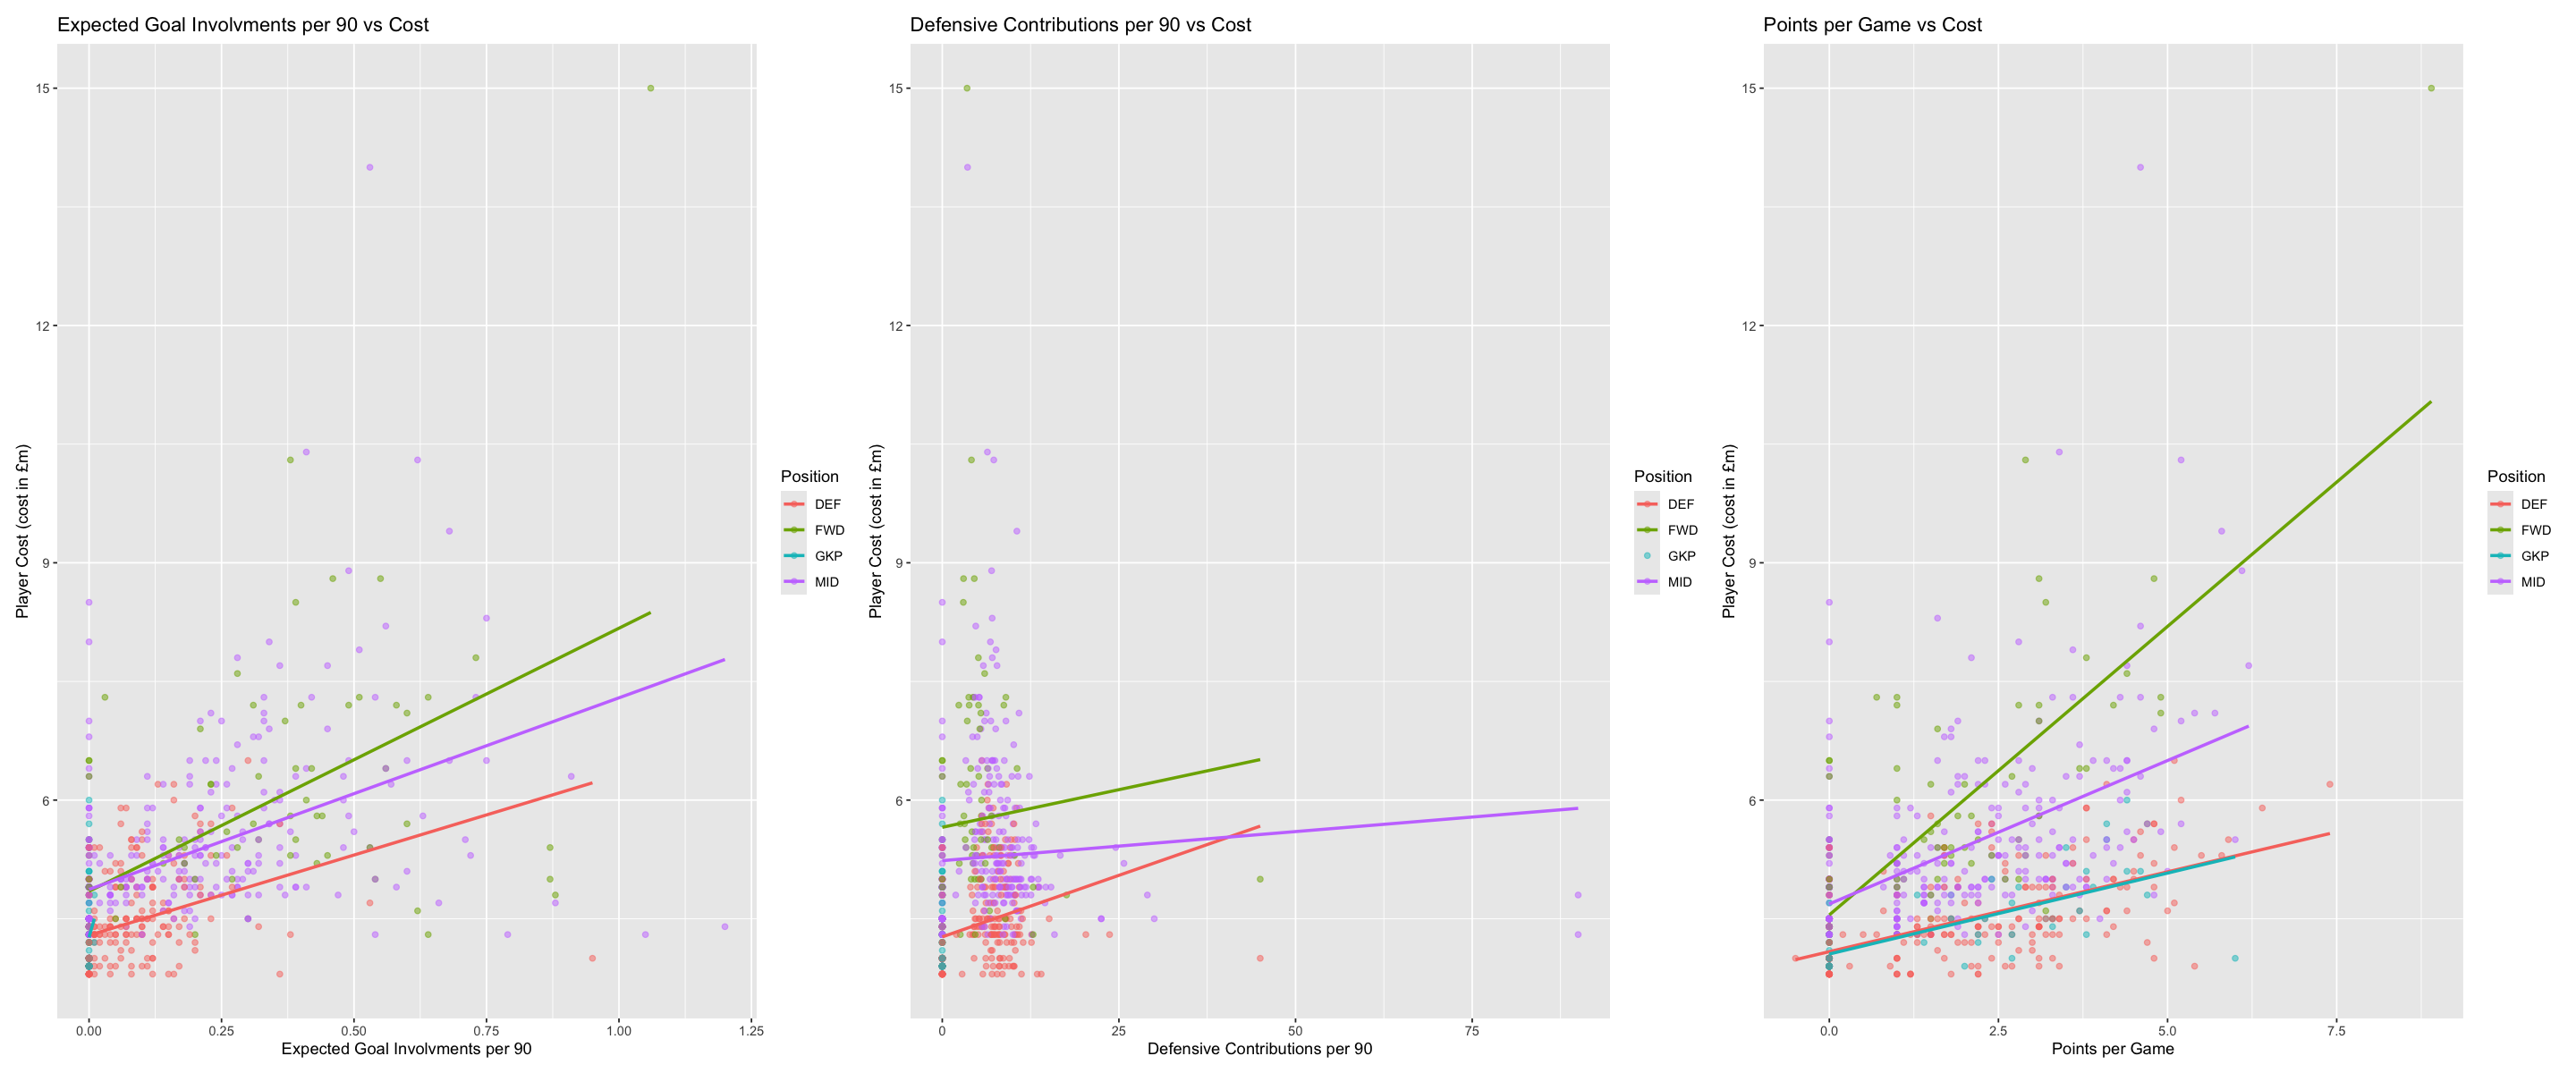

In [32]:
options(repr.plot.width = 24, repr.plot.height = 10)

expectedgoals_to_cost_plot <- fpl_data |>
    ggplot(aes(x = expected_goal_involvements_per_90, y = now_cost, color = position_name)) +
        geom_point(alpha = 0.5) +
         geom_smooth(se = FALSE, method = "lm") +
        labs(title = "Expected Goal Involvments per 90 vs Cost",
            x = "Expected Goal Involvments per 90",
            y = "Player Cost (cost in £m)",
            color = "Position")

defensive_contributions_to_cost_plot <- fpl_data |>
    ggplot(aes(x = defensive_contribution_per_90, y = now_cost, color = position_name)) +
        geom_point(alpha = 0.5) +
         geom_smooth(se = FALSE, method = "lm") +
        labs(title = "Defensive Contributions per 90 vs Cost",
            x = "Defensive Contributions per 90",
            y = "Player Cost (cost in £m)",
            color = "Position")



points_per_game_to_cost_plot <- fpl_data |>
    ggplot(aes(x = points_per_game, y = now_cost, color = position_name)) +
        geom_point(alpha = 0.5) +
         geom_smooth(se = FALSE, method = "lm") +
        labs(title = "Points per Game vs Cost",
            x = "Points per Game",
            y = "Player Cost (cost in £m)",
            color = "Position")

expectedgoals_to_cost_plot | defensive_contributions_to_cost_plot | points_per_game_to_cost_plot

#### Plot Analysis:

Expected Goal Invovlements per 90 vs Cost: We can observe a clear positive slope overall, with the slopes for forwards and midfielders being more steep than the slope for defenders. This suggests that pricing heavily weights goal contributions when assigning prices to midfielders and attackers.

Defensive Contributions per 90 vs Cost: From this plot, we can observe flat and weaker slopes for forwards and midfielders, with a steeper and more positive slope for defenders, suggesting that defensive conributions are a metric which are less relevant when it comes to pricing of players.

Points Per Game vs Cost: This final plot shows a positive relation between points per game and cost, however this relationship must partly mechanical as the player costs are updated based on expected points, so one must be careful when using points per game as a predictor.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


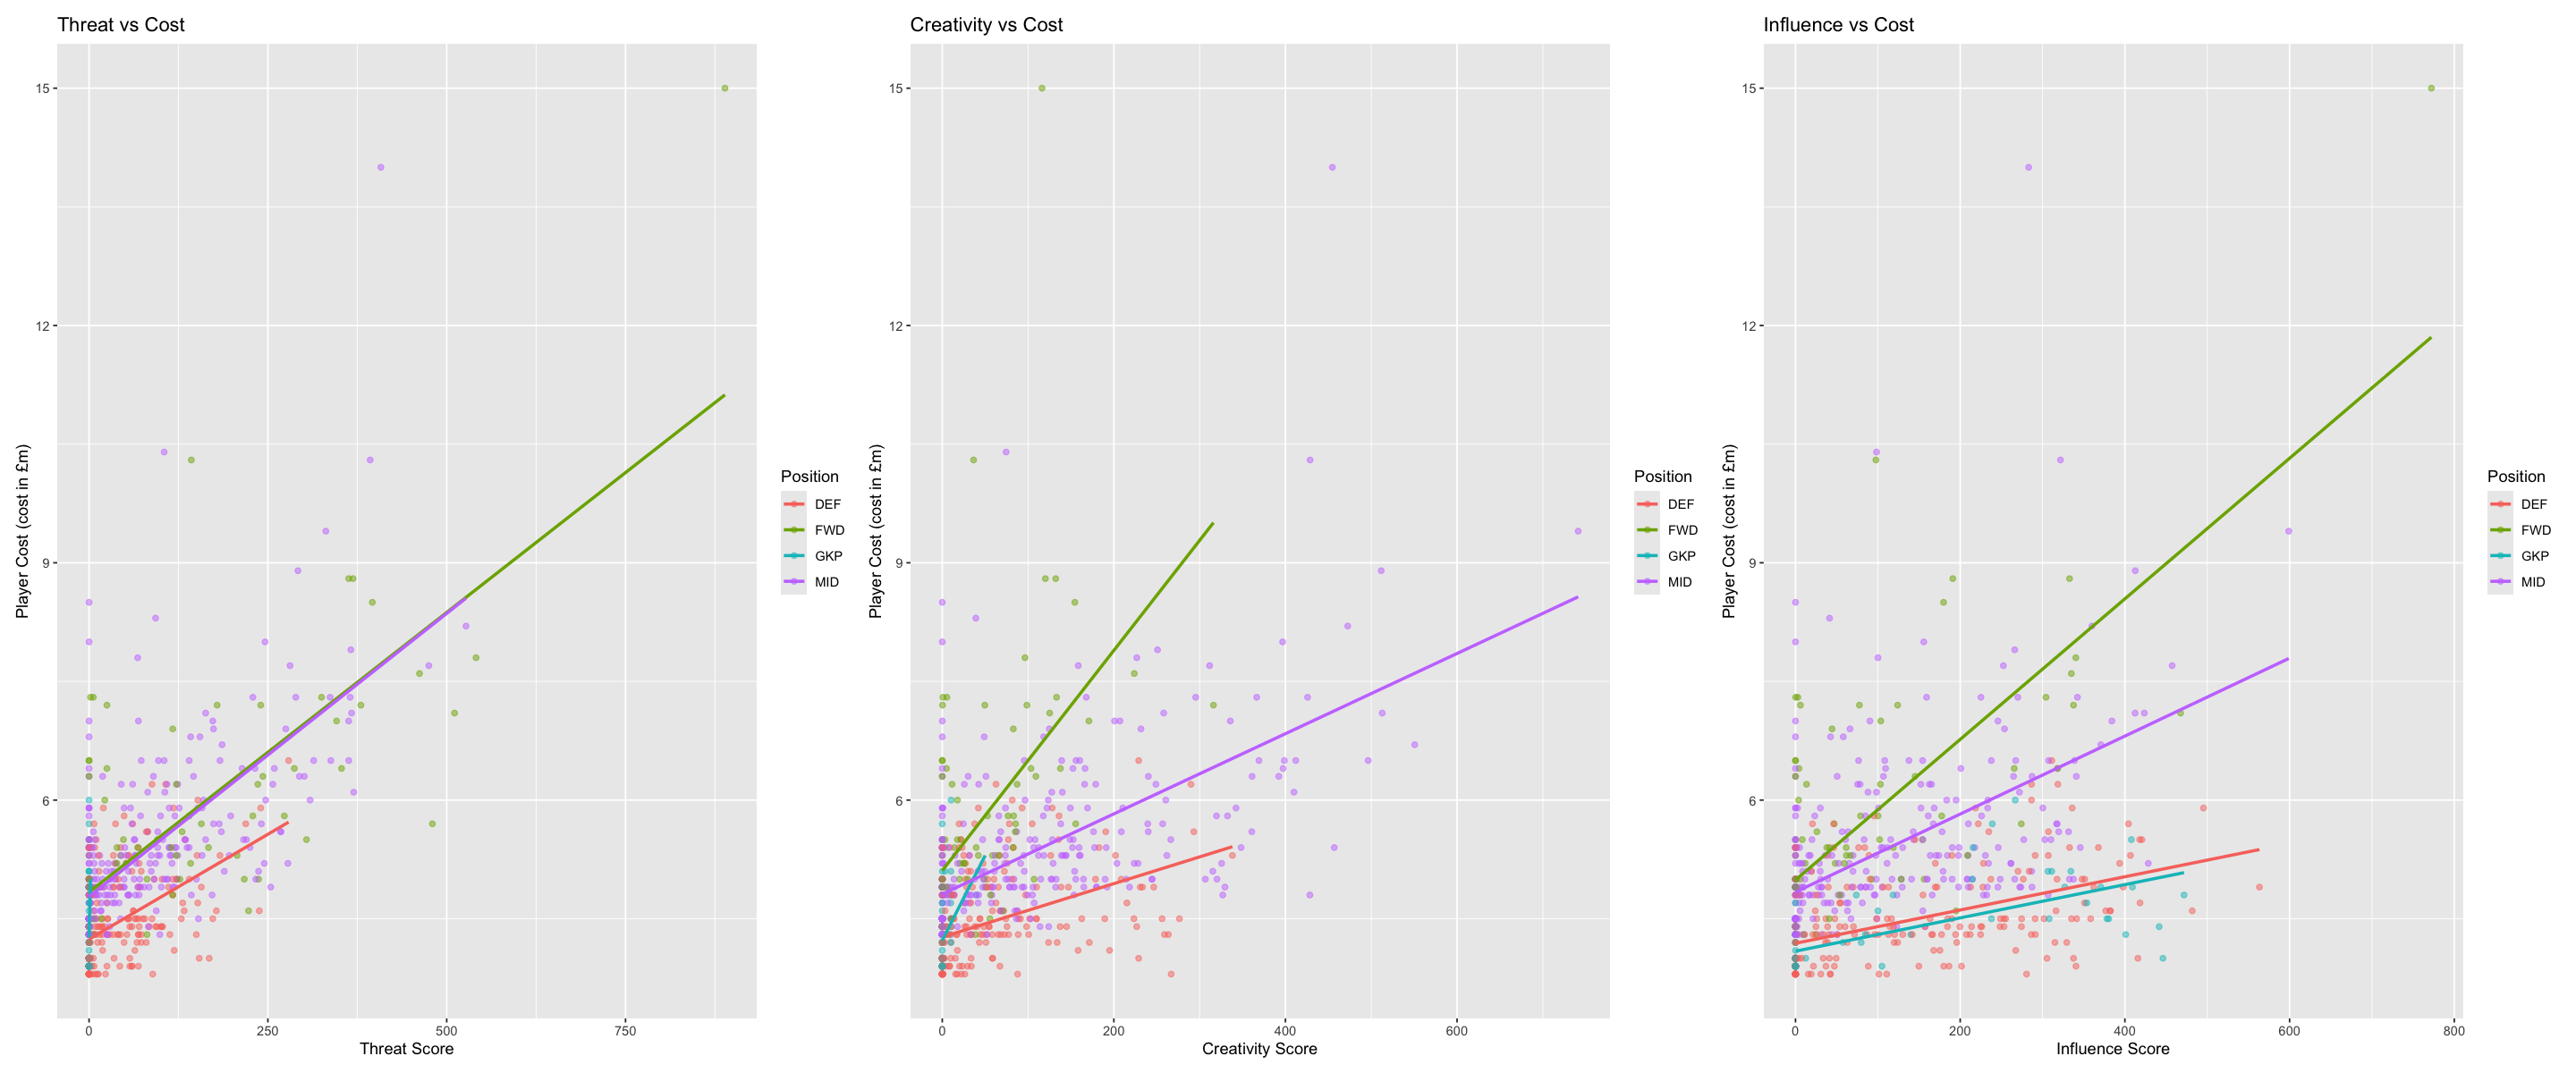

In [33]:
options(repr.plot.width = 24, repr.plot.height = 10)

threat_to_cost_plot <- fpl_data |>
    ggplot(aes(x = threat, y = now_cost, color = position_name)) +
        geom_point(alpha = 0.5) +
         geom_smooth(se = FALSE, method = "lm") +
        labs(title = "Threat vs Cost",
            x = "Threat Score",
            y = "Player Cost (cost in £m)",
            color = "Position")

creativity_to_cost_plot <- fpl_data |>
    ggplot(aes(x = creativity, y = now_cost, color = position_name)) +
        geom_point(alpha = 0.5) +
         geom_smooth(se = FALSE, method = "lm") +
        labs(title = "Creativity vs Cost",
            x = "Creativity Score",
            y = "Player Cost (cost in £m)",
            color = "Position")



influence_to_cost_plot <- fpl_data |>
    ggplot(aes(x = influence, y = now_cost, color = position_name)) +
        geom_point(alpha = 0.5) +
         geom_smooth(se = FALSE, method = "lm") +
        labs(title = "Influence vs Cost",
            x = "Influence Score",
            y = "Player Cost (cost in £m)",
            color = "Position")

threat_to_cost_plot | creativity_to_cost_plot | influence_to_cost_plot

#### Plot Analysis:

Threat vs Cost: Threat shows a strong positive association with cost for attacking positions, which suggests that it plays a big role when determining the value of forwards and midfielders. This relationship is weaker for defensive positions, which indicated the limited relevance of threat outside of attacking roles.

Creativity vs Cost: Creativity shows a positive, but nosy relationship with cost,especially for midfielders. Although players with high creativity seem to be more expensive, high dispersion indicates that it is not sufficient alone as a predictor.

Influence vs Cost: Influence shows a strong positive association with cost across all positions, representing that pricing of players will highly associated with overall match performance and impact. However influence as a metric may be a reflection of other variables that are embedded in player pricing.